## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata,study_results, on = "Mouse ID", how = "outer")
# Display the data table for preview
mouse_study_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = mouse_study_df["Mouse ID"].value_counts()
len(num_mice)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = mouse_study_df[mouse_study_df.duplicated(["Mouse ID", "Timepoint"])]  
dup_mice = dup_mice["Mouse ID"].unique()
dup_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mouse_info = mouse_study_df.loc[mouse_study_df["Mouse ID"]==dup_mice[0]]
dup_mouse_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = mouse_study_df[mouse_study_df["Mouse ID"] != dup_mice[0]]
clean_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice_clean = clean_mouse_df["Mouse ID"].value_counts()
len(num_mice_clean)

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

#create needed lists
mean_drugs= []
median_drugs = []
variance_drugs = []
std_dev_drugs = []
SEM_drugs =  []

#get an array of the drugs and make into a series
drugs = clean_mouse_df["Drug Regimen"].unique()
drugs_series = pd.Series(drugs)
drugs_series = drugs_series.rename("Drug Regimen")

for drug in drugs:
    #locate current drug in clean_mouse_df 
    drug_df = clean_mouse_df.loc[clean_mouse_df["Drug Regimen"] == drug, :]
    drug_mean = round(drug_df["Tumor Volume (mm3)"].mean(),2)
    mean_drugs.append(drug_mean)
    drug_median = round(drug_df["Tumor Volume (mm3)"].median(),2)
    median_drugs.append(drug_median)
    drug_var = round(np.var(drug_df["Tumor Volume (mm3)"],ddof = 0),2)
    variance_drugs.append(drug_var)
    drug_stdev = round(np.std(drug_df["Tumor Volume (mm3)"],ddof = 0),2)
    std_dev_drugs.append(drug_stdev)
    drug_sem = round(st.sem(drug_df["Tumor Volume (mm3)"]),2)
    SEM_drugs.append(drug_sem)

    
mean_drugs = pd.Series(mean_drugs)
mean_drugs = mean_drugs.rename("Mean of Tumor Vol")
median_drugs = pd.Series(median_drugs)
median_drugs = median_drugs.rename("Median of Tumor Vol")
variance_drugs = pd.Series(variance_drugs)
variance_drugs = variance_drugs.rename("Variance of Tumor Vol")
std_dev_drugs = pd.Series(std_dev_drugs)
std_dev_drugs = std_dev_drugs.rename("Standard Deviation of Tumor Vol")
SEM_drugs = pd.Series(SEM_drugs)
SEM_drugs = SEM_drugs.rename("SEM of Tumor Vol")

#take above series and concat into a dataframe
Sum_table =pd.concat([drugs_series, mean_drugs,median_drugs,variance_drugs,std_dev_drugs,SEM_drugs], axis = 1)
#reset index to drug names column
Sum_table.set_index('Drug Regimen')


,Mean of Tumor Vol,Median of Tumor Vol,Variance of Tumor Vol,Standard Deviation of Tumor Vol,SEM of Tumor Vol
Drug Regimen,,,,,
Ramicane,40.22,40.67,23.38,4.84,0.32
Capomulin,40.68,41.56,24.84,4.98,0.33
Infubinol,52.88,51.82,42.89,6.55,0.49
Placebo,54.03,52.29,60.83,7.80,0.58
Ceftamin,52.59,51.78,39.07,6.25,0.47
Stelasyn,54.23,52.43,59.12,7.69,0.57
Zoniferol,53.24,51.82,48.27,6.95,0.52
Ketapril,55.24,53.70,68.19,8.26,0.60
Propriva,52.32,50.45,43.56,6.60,0.54


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

#Aggregate data
#source: https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
drug_group = clean_mouse_df.groupby("Drug Regimen").aggregate([np.mean, np.median, np.var, np.std, st.sem])
drug_group_org = drug_group["Tumor Volume (mm3)"]
drug_group_org
drug_group_org = drug_group_org.rename(columns ={"mean":"Mean of Tumor Vol", "median":"Median of Tumor Vol", "var":"Variance of Tumor Vol", "std":"Standard Deviation of Tumor Vol", "sem":"SEM of Tumor Vol"})

#round all data in dataframe
#source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html
drug_group_org.round(2)

,Mean of Tumor Vol,Median of Tumor Vol,Variance of Tumor Vol,Standard Deviation of Tumor Vol,SEM of Tumor Vol
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

Text(66.25, 0.5, 'Number of Mice')

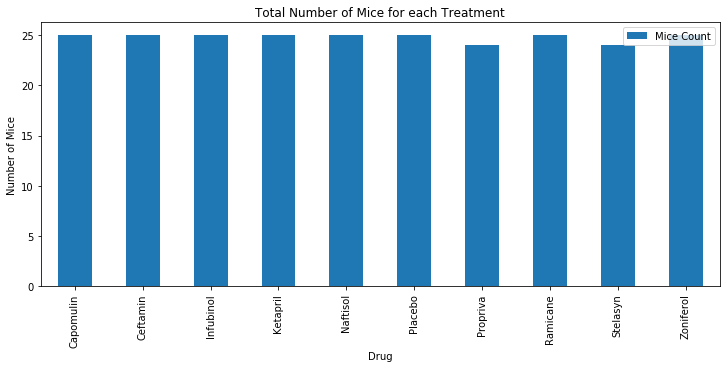

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

Mouse_counts = clean_mouse_df.groupby("Drug Regimen")["Mouse ID"].unique()
Mouse_counts
Mice_per_drug = []
Drugs = []
for x in range(len(Mouse_counts)):
    counter = len(Mouse_counts[x])
    Mice_per_drug.append(counter)
    drug = Mouse_counts.index[x]
    Drugs.append(drug)
Mice_per_drug = pd.Series(Mice_per_drug)
Mice_per_drug = Mice_per_drug.rename("Mice Count")
Drugs = pd.Series(Drugs)
Drugs = Drugs.rename("Drug")
Bar_data =pd.concat([Drugs, Mice_per_drug], axis = 1)
Bar_data = Bar_data.set_index("Drug")

#Plotting bar chart
Bar_data.plot(kind = "bar", figsize = (10,5))
plt.tight_layout()
plt.legend(loc = "upper right")
plt.title("Total Number of Mice for each Treatment")
plt.ylabel("Number of Mice")

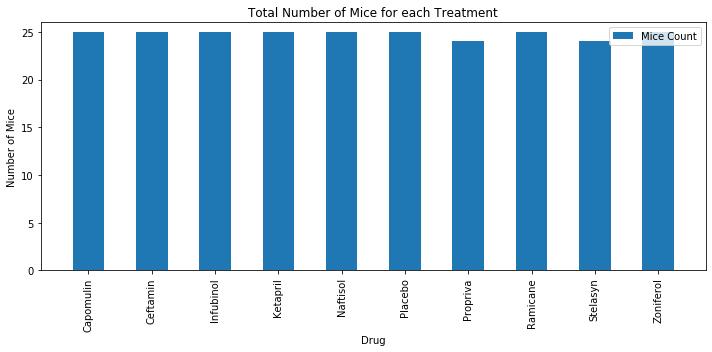

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.figure(figsize = (10,5))
plt.bar(Drugs,Mice_per_drug, width = 0.5, label = "Mice Count")
plt.title("Total Number of Mice for each Treatment")
plt.xlabel("Drug")
plt.xticks(rotation = 'vertical')
plt.ylabel("Number of Mice")
plt.xlim(-0.75, len(Drugs)-0.25)
plt.ylim(0, max(Mice_per_drug)+1)
plt.legend(loc = "upper right")
plt.tight_layout()

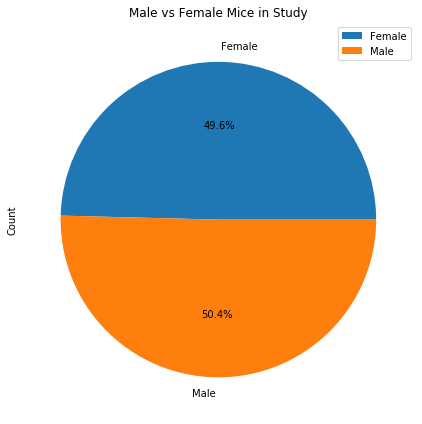

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#group by Mouse ID and find individual Gender categories
Gender_df = clean_mouse_df.groupby("Mouse ID")["Sex"].value_counts()
#count number of each gender category
gender_count = Gender_df.count("Sex")
gender_count = pd.DataFrame(gender_count)
gender_count = gender_count.rename(columns = {"Sex":"Count"})
gender_count.plot(kind = "pie",subplots = True, figsize = (6,6),autopct='%1.1f%%')
plt.title("Male vs Female Mice in Study")
plt.tight_layout()

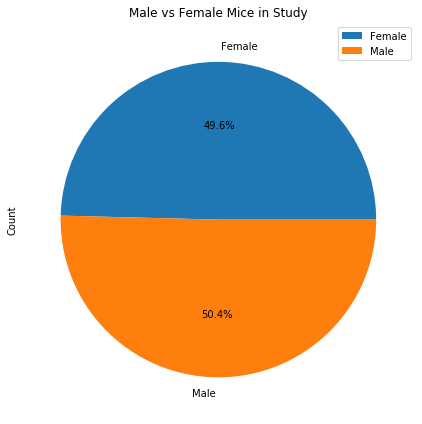

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sizes = gender_count["Count"]
labels = gender_count.index
plt.figure(figsize = (6,6))
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.tight_layout()
plt.title("Male vs Female Mice in Study")
plt.legend(loc = "upper right")
plt.ylabel("Count")
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Reduced_df = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == "Capomulin")|(clean_mouse_df["Drug Regimen"] == "Ramicane")|(clean_mouse_df["Drug Regimen"] == "Infubinol")|(clean_mouse_df["Drug Regimen"] == "Ceftamin"),:]  
Capomulin_df = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == "Capomulin"),:]
Ramicane_df = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == "Ramicane"),:]
Infubinol_df = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == "Infubinol"),:]
Ceftamin_df = clean_mouse_df.loc[(clean_mouse_df["Drug Regimen"] == "Ceftamin"),:]


Capomulin_mice = Capomulin_df["Mouse ID"].unique()
Ramicane_mice = Ramicane_df["Mouse ID"].unique()
Infubinol_mice = Infubinol_df["Mouse ID"].unique()
Ceftamin_mice = Ceftamin_df["Mouse ID"].unique()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


array(['s185', 'x401', 'm601', 'f966', 'u364', 'y793', 'r554', 'm957',
       't565', 'i738', 'w914', 'g288', 'l897', 'b742', 'b128', 'j246',
       'j119', 'w150', 'v923', 'g316', 's710', 'l509', 'r944', 'i557',
       'r157'], dtype=object)

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
